In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%cd "C:\DSBA\Advanced BA\Project"

C:\DSBA\Advanced BA\Project


**Sales Force Contacts**

In [6]:
df=pd.read_csv('SalesForce_Contact.csv',encoding="iso-8859-1")
df.head()

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,Send_Green_Survey__c,Professional_Certification__c,TS_Referral_Requested_By__c,RealZip__RealZip__c,Discharge_Type__c,Discharge_Disposition__c,Date_Turned_Black__c,Litmos__Litmos_Login_Access__c,Litmos__Total_Sum_Percentages__c,Willing_to_Relocate_to_High_Risk_Area__c
0,0030z00002PrWd6AAF,0015000000KUwKAAA1,01238000000UVfW,CA,95821,United States,NaN,00550000000ztRtAAI,0,0,...,0,NaN,NaN,a5D38000000I4fJEAS,NaN,NaN,NaN,No,NaN,0.0
1,0030z00002PrWdBAAV,0015000000KUwKAAA1,01238000000UVfW,VA,NaN,United States,NaN,00538000005ZA5kAAG,0,0,...,0,NaN,NaN,a5D38000000I8CkEAK,NaN,NaN,NaN,No,NaN,0.0
2,0030z00002PrWflAAF,0015000000KUwKAAA1,01238000000UVfW,GA,31905,United States,NaN,005380000063Mg0AAE,0,0,...,0,NaN,NaN,a5D38000000I8xAEAS,Honorable Discharge,NaN,NaN,No,NaN,0.0
3,0030z00002PrWgPAAV,0015000000KUwKAAA1,01238000000UVfW,MI,48628,United States,NaN,00550000001zVqjAAE,0,0,...,0,NaN,NaN,a5D38000000I9lSEAS,NaN,NaN,NaN,No,NaN,0.0
4,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,0,NaN,NaN,a5D38000000I35QEAS,NaN,NaN,8/9/2018 0:00,No,NaN,0.0


In [4]:
df.isnull().sum()

Id                                               0
AccountId                                        0
RecordTypeId                                     0
MailingState                                  8083
MailingPostalCode                            16898
                                             ...  
Discharge_Disposition__c                    131463
Date_Turned_Black__c                        118483
Litmos__Litmos_Login_Access__c              109203
Litmos__Total_Sum_Percentages__c            132445
Willing_to_Relocate_to_High_Risk_Area__c     21737
Length: 391, dtype: int64

In [5]:
df.shape

(132445, 391)

In [6]:
null_cnt=pd.DataFrame(df.isnull().sum())
null_cnt.reset_index(inplace=True)
null_cnt.columns=['Columns','NULL']
null_cnt[null_cnt['NULL']>60000]['Columns'].tolist()
#null_cnt.to_csv('Contact_NULL.csv')

['LeadSource',
 'Volunteer_Interests__c',
 'Vendor_Contact__c',
 'Gender__c',
 'Race__c',
 'Number_of_dependents__c',
 'Employment_Barriers__c',
 'Start_Date__c',
 'Additional_Service_Needs__c',
 'Previously_Interviewed__c',
 'Referral_Date__c',
 'Date_of_Service_Entry__c',
 'Last_Rank__c',
 'Unsubscribe__c',
 'O2O_Status__c',
 'O2O_Partners_Previously_Applied_To__c',
 'X3_Month_Survey_Date__c',
 'Mileage_Willing_To_Commute__c',
 'Referred_To__c',
 'X6_Month_Survey_Date__c',
 'Security_Clearance_Description__c',
 'OIF_OEF_Deployed__c',
 'Reasons_For_Additional_Service__c',
 'CRF_Impact__c',
 'Purple_Heart_Recipient__c',
 'Job_Function_Hired_In__c',
 'Desired_Job_Function__c',
 'Possible_Job_Matches__c',
 'Date_Assigned_To_Online__c',
 'Military_Occupation__c',
 'Submitted_for_Mentor__c',
 'VTS_Recommended_Seniority_Level__c',
 'Assessment_Completed_By__c',
 'Resume_Completed_By__c',
 'contact_history__c',
 'Independence_Project_Group__c',
 'Dat_Initial_Assessment_was_Completed__c',
 'H

*Select the list of variables from data dictionary*

In [7]:
data_dict=pd.read_excel('HHUSA Data Dictionary.xlsx',sheet_name='Contact')
col_lst=data_dict[data_dict['Select']=="Yes"]['API NAME'].tolist()
col_lst

['Id',
 'AccountId',
 'RecordTypeId',
 'MailingState',
 'MailingPostalCode',
 'MailingCountry',
 'OwnerId',
 'HasOptedOutOfEmail',
 'HasOptedOutOfFax',
 'DoNotCall',
 'CanAllowPortalSelfReg',
 'CreatedDate',
 'CreatedById',
 'LastModifiedDate',
 'LastModifiedById',
 'SystemModstamp',
 'LastActivityDate',
 'Previous_HH_Client__c',
 'Tableau_Fix__c',
 'Multiple_AVR__c',
 'Do_Not_Mail_old__c',
 'Gender__c',
 'Interview_Skills__c',
 'Veteran_agreed_to_terms_at_Registration__c',
 'Start_Date__c',
 'Volunteer_Agreement_on_File__c',
 'Date_of_Service_Entry__c',
 'Active__c',
 'Mileage_Willing_To_Commute__c',
 'Alumni_Survey_Completed__c',
 'Send_Retention_Survey__c',
 'Security_Clearance_Description__c',
 'Temporarily_Unavailable__c',
 'Highest_Level_of_Education_Completed__c',
 'OIF_OEF_Deployed__c',
 'Status__c',
 'DD214__c',
 'Purple_Heart_Recipient__c',
 'Active_Color__c',
 'Desired_Job_Function__c',
 'VTS_Recommended_Seniority_Level__c',
 'Assessment_Completed_By__c',
 'Dat_Initial_Asses

In [8]:
#What are the basic qualificaations
#Where are they from (state and country)
#How long did they serve in army
#What is their desired job and salary
#How many are ttaking online training
#How many got hired (important)
#How many are disbled
#What are their skillsets

*Missing data pattern*

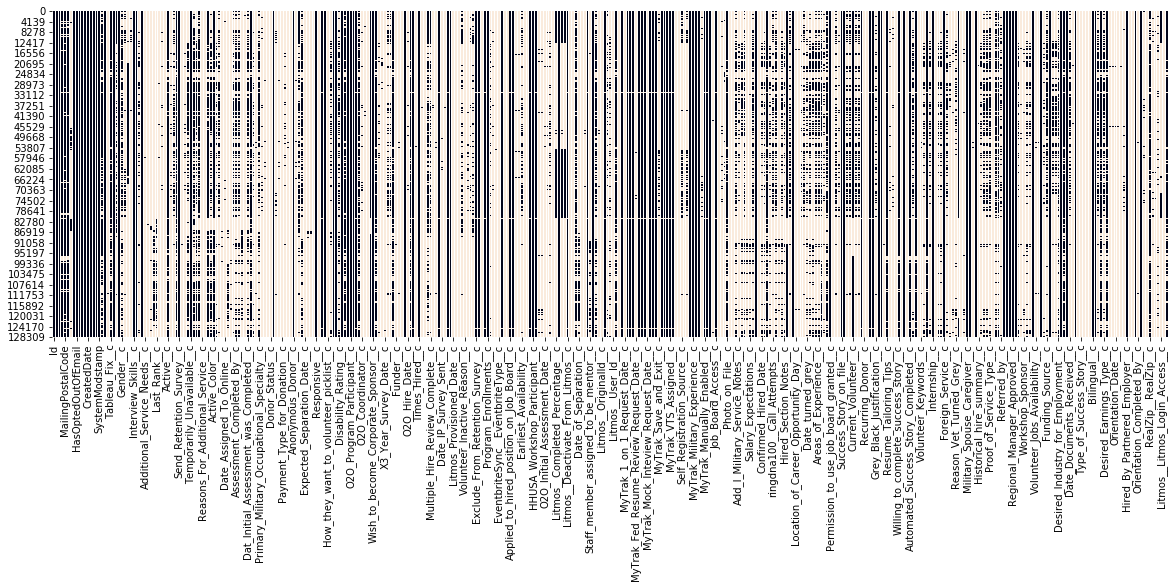

In [12]:
plt.rcParams["figure.figsize"] = (20,6)
sns.heatmap(df.isnull(), cbar=False)

*After slecting columns from Dictionary*

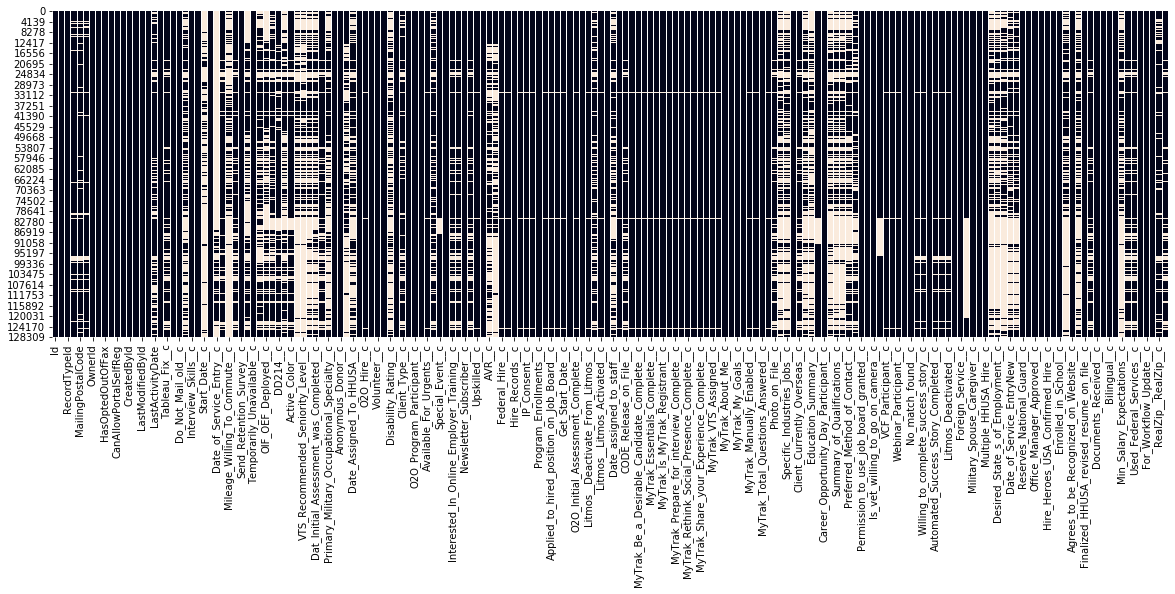

In [8]:
df_filt=df[col_lst]
plt.rcParams["figure.figsize"] = (20,6)
sns.heatmap(df_filt.isnull(), cbar=False)

**Applicants States and countries**

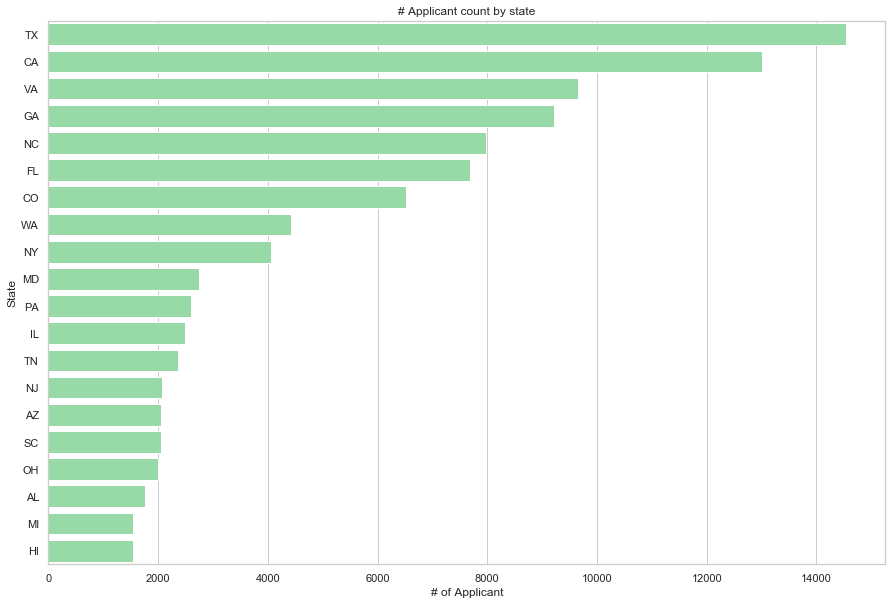

In [19]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="MailingState", y='index', data=df_filt['MailingState'].value_counts()[:20].reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="State", title='# Applicant count by state',
       xlabel="# of Applicant")

plt.show()

In [20]:
df_filt['MailingCountry'].value_counts()

United States           121072
USA                       1376
Germany                    261
Japan                       64
Puerto Rico                 51
                         ...  
Ramstein AB, Germany         1
Djibouti                     1
29226                        1
27603                        1
BE                           1
Name: MailingCountry, Length: 118, dtype: int64

In [33]:
state=df_filt[(df_filt['MailingCountry']=='United States')|(df_filt['MailingCountry']=='USA')]
state['MailingState'].value_counts()

TX                14363
CA                12859
VA                 9440
GA                 9052
NC                 7766
                  ...  
VQ                    1
Ca.                   1
Ct                    1
illinois              1
Argentina 1147        1
Name: MailingState, Length: 243, dtype: int64

In [35]:
state=state[['MailingState']]
#state.to_csv('Q1_state.csv')

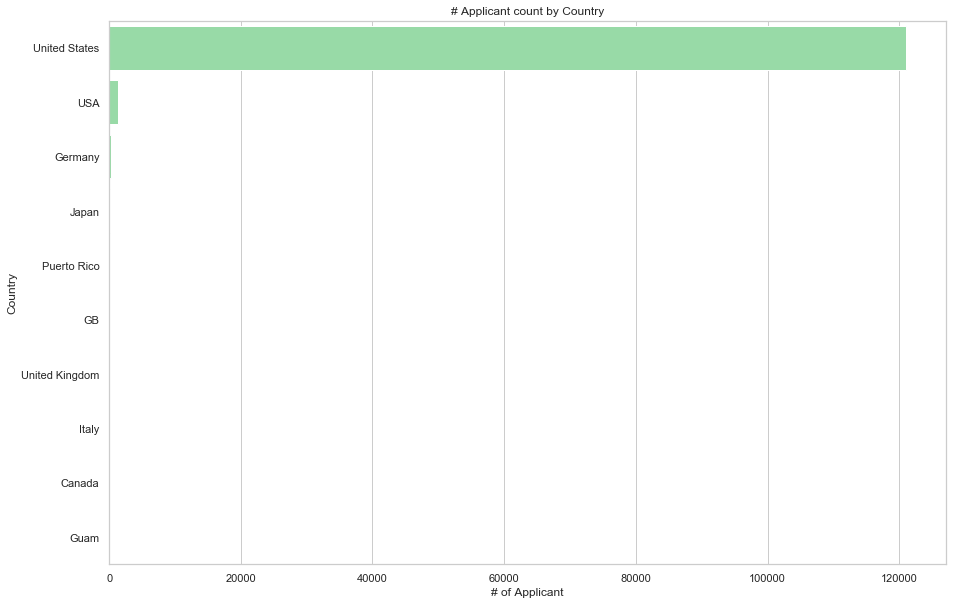

In [22]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="MailingCountry", y='index', data=df_filt['MailingCountry'].value_counts()[:10].reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="Country", title='# Applicant count by Country',
       xlabel="# of Applicant")

plt.show()

In [23]:
df_filt['Gender__c'].value_counts()

Male        52760
Female      16515
--None--       11
Name: Gender__c, dtype: int64

**Check the Application date**

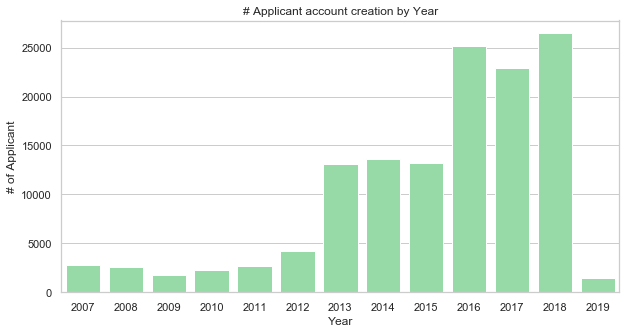

In [9]:
df_filt['CreatedDate']=pd.to_datetime(df_filt['CreatedDate'])
df_filt['Created_Year']=df_filt['CreatedDate'].dt.year
df_filt['Created_month']=df_filt['CreatedDate'].dt.month

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='Created_Year', data=df_filt['Created_Year'].value_counts().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="# of Applicant", title='# Applicant account creation by Year',
       xlabel="Year")

plt.show()

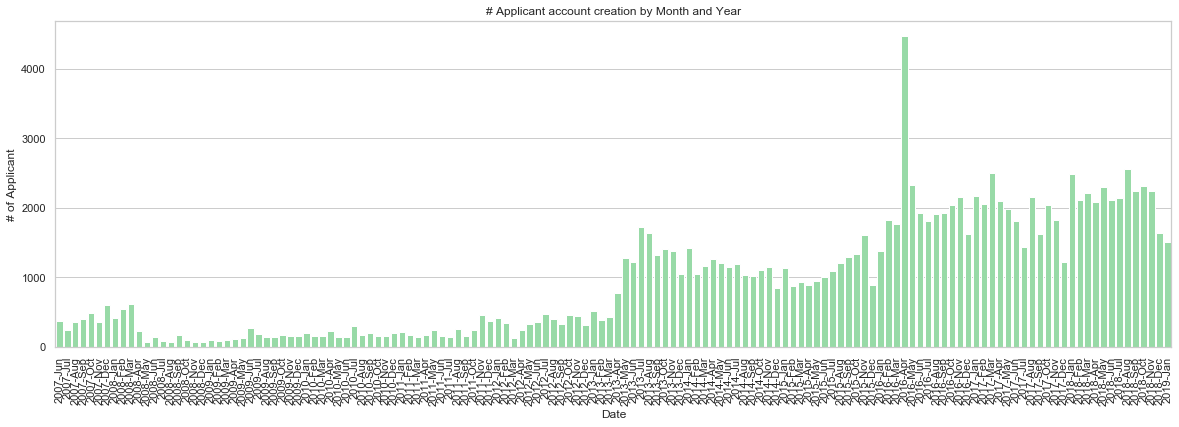

In [36]:
#camp=df[['vr__Mail_Date__c','vr__Clicked__c','vr__Opened__c','vr__Sent__c','vr__Bounced__c']]
#camp['vr__Mail_Date__c']=pd.to_datetime(camp['vr__Mail_Date__c'])
df_filt['Created_date_new'] = df_filt['CreatedDate'].apply(lambda dt: dt.replace(day=1))
df_filt['Created_date_new']=df_filt['Created_date_new'].dt.date
df_filt.sort_values(by=['Created_date_new'],ascending=True,inplace=True)

#mnth=df_filt.groupby(['Created_date_new']).sum()
#mnth.reset_index(inplace=True)

# PLOTTING
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 6))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='Created_date_new', data=df_filt['Created_date_new'].value_counts().sort_index().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="# of Applicant", title='# Applicant account creation by Month and Year',
       xlabel="Date")

x_dates = pd.to_datetime(df_filt['Created_date_new']).dt.strftime('%Y-%b').unique()
ax.set_xticklabels(labels=x_dates,rotation=90)

plt.show()

**there is major peak in Number of applicants on April 2016**

In [28]:
df_filt['Created_date_new'].value_counts().sort_values(ascending=False)

2016-04-01    4464
2018-08-01    2565
2017-03-01    2501
2018-01-01    2485
2016-05-01    2328
              ... 
2009-02-01      80
2008-12-01      73
2008-11-01      72
2008-05-01      70
2008-08-01      66
Name: Created_date_new, Length: 140, dtype: int64

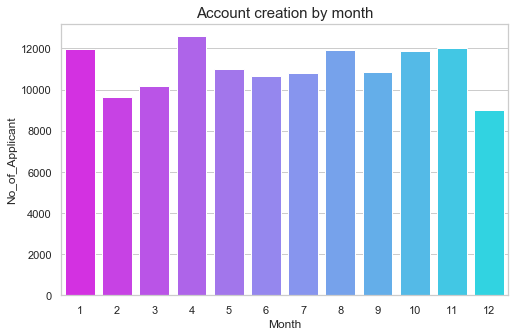

In [58]:
m10 = df_filt['Created_month'].value_counts().reset_index().rename(columns={'index': 'Month', 'Created_month':'No_of_Applicant'})
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x="Month", y="No_of_Applicant", data=m10,palette='cool_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Account creation by month', fontsize=15)
plt.show()

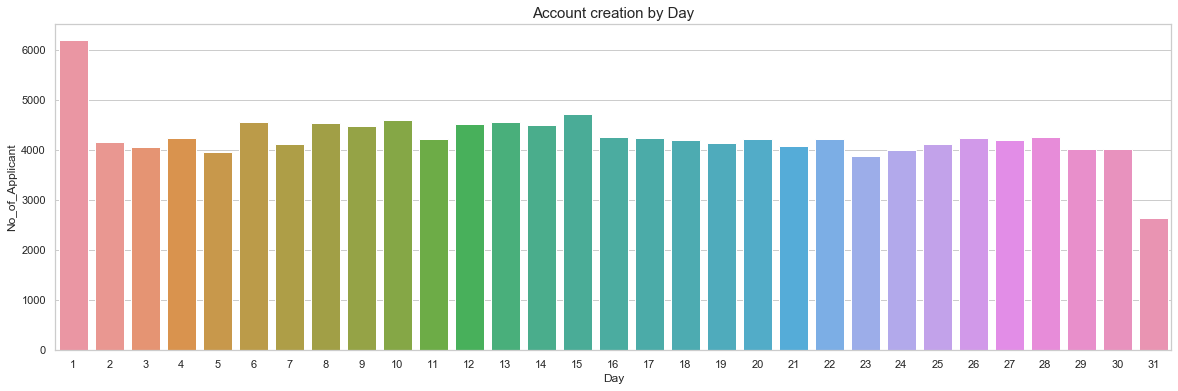

In [40]:
df_filt['Created_day']=df_filt['CreatedDate'].dt.day
d10 = df_filt['Created_day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Created_day':'No_of_Applicant'})
ax = sns.barplot(x="Day", y="No_of_Applicant", data=d10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Account creation by Day', fontsize=15)
plt.show()

In [ ]:
#Plot for april 2016

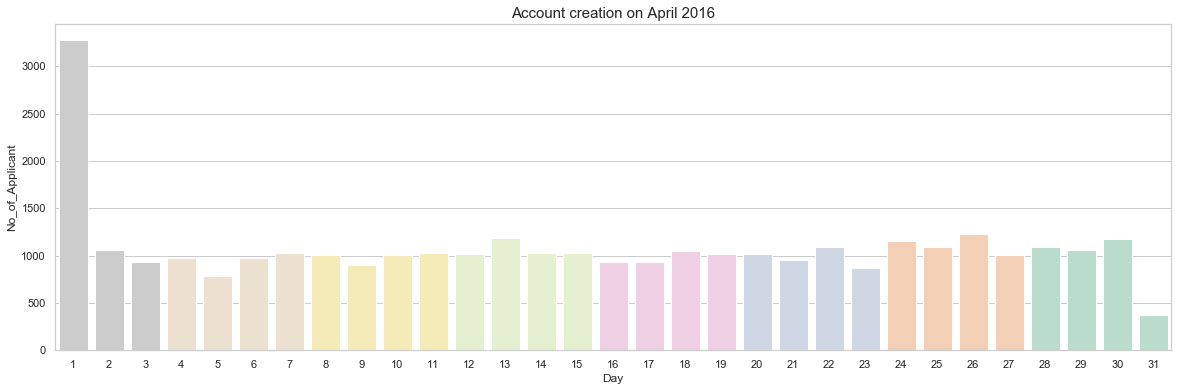

In [53]:
apil16=df_filt[(df_filt['CreatedDate'].dt.month==4)|((df_filt['CreatedDate'].dt.year==2016))]
d10 = apil16['Created_day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Created_day':'No_of_Applicant'})
ax = sns.barplot(x="Day", y="No_of_Applicant", data=d10,palette='Pastel2_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Account creation on April 2016', fontsize=15)
plt.show()

The month of april influences the previous chart

In [ ]:
#Check excluding this

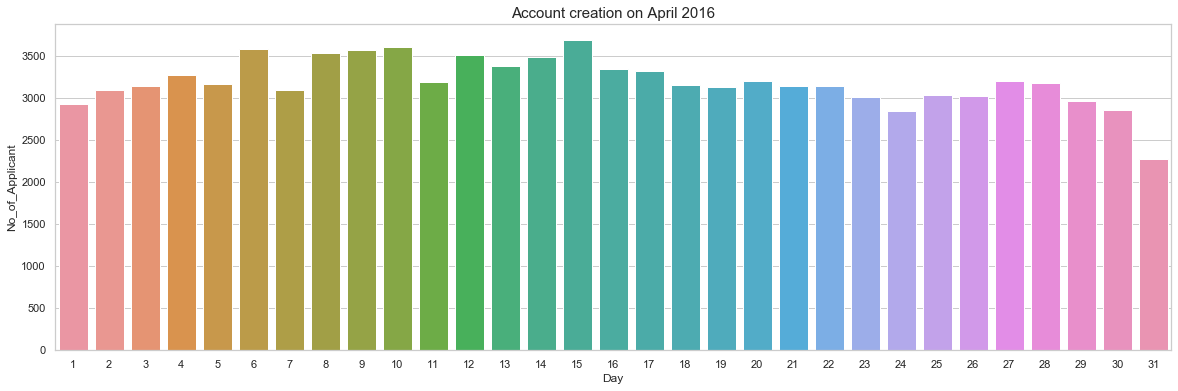

In [46]:
other16=df_filt[(df_filt['CreatedDate'].dt.month!=4)&((df_filt['CreatedDate'].dt.year!=2016))]
d10 = other16['Created_day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Created_day':'No_of_Applicant'})
ax = sns.barplot(x="Day", y="No_of_Applicant", data=d10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Account creation on April 2016', fontsize=15)
plt.show()

This is the actual trend excluding that month

**Explore the influence of time**

In [63]:
df_filt['time']=[d.time() for d in df_filt['CreatedDate']]

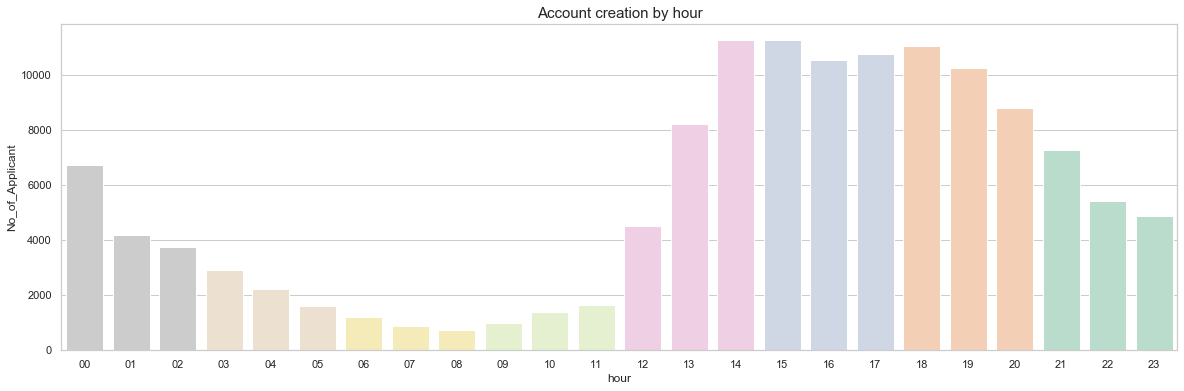

In [74]:
tme=df_filt.copy()
tme['hour']=tme['time'].astype(str).str[0:2]
d10 = tme['hour'].value_counts().reset_index().rename(columns={'index': 'hour', 'hour':'No_of_Applicant'})
ax = sns.barplot(x="hour", y="No_of_Applicant", data=d10,palette='Pastel2_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Account creation by hour', fontsize=15)
plt.show()

Hours from 2 pm to 6 pm seem to be the right time to mail since most accounts are created during this time

**Check the hires**

*No of hires confirmed*

In [39]:
df_filt['Submitted_for_Hire__c'].value_counts()

0    109430
1     23015
Name: Submitted_for_Hire__c, dtype: int64

**Check donor information**

In [40]:
df_filt['RecordTypeId'].value_counts()

01238000000UVfW    132441
012380000009w7G         4
Name: RecordTypeId, dtype: int64

In [42]:
df_filt[df_filt['RecordTypeId']=='012380000009w7G']

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,DoNotCall,...,Min_Salary_Expectations__c,Used_Volunteer_Services__c,Used_Federal_Services__c,Hired_By_Partnered_Employer__c,For_Workflow_Update__c,Send_Green_Survey__c,RealZip__RealZip__c,Willing_to_Relocate_to_High_Risk_Area__c,Created_Year,Created_month
28614,0033800002an4XkAAI,0013800001AMmtnAAD,012380000009w7G,GA,30080-1234,United States,00538000004gsNsAAI,0,0,0,...,"$100,000+",NaN,NaN,0,0,0,a5D38000000I9mPEAS,NaN,2016,5
28615,0033800002an4YOAAY,0013800001AMmtnAAD,012380000009w7G,GA,30005,United States,00538000004gsNsAAI,0,0,0,...,NaN,NaN,NaN,0,0,0,a5D38000000I6xHEAS,NaN,2016,5
28616,0033800002an4YYAAY,0013800001AMmtnAAD,012380000009w7G,CA,48952,United States,00538000004gsNsAAI,0,0,0,...,"$20,000 - $29,999",NaN,NaN,0,0,1,NaN,NaN,2016,5
28617,0033800002an4YxAAI,0013800001AMmtnAAD,012380000009w7G,MO,30115,United States,00538000004gsNsAAI,0,0,0,...,NaN,NaN,NaN,0,0,0,a5D38000000I9vrEAC,NaN,2016,5


In [41]:
df_filt['stayclassy__opt_in__c'].value_counts()

0    131342
1      1103
Name: stayclassy__opt_in__c, dtype: int64

In [44]:
doners=df_filt[df_filt['stayclassy__opt_in__c']==1]
doners

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,DoNotCall,...,Min_Salary_Expectations__c,Used_Volunteer_Services__c,Used_Federal_Services__c,Hired_By_Partnered_Employer__c,For_Workflow_Update__c,Send_Green_Survey__c,RealZip__RealZip__c,Willing_to_Relocate_to_High_Risk_Area__c,Created_Year,Created_month
772,0030z00002QXUydAAH,0010z00001ShoChAAJ,01238000000UVfW,AZ,85224-2357,United States,00538000005DYwAAAW,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
1281,0030z00002QXvdnAAD,0010z00001Si3BiAAJ,01238000000UVfW,CA,90046-1723,United States,00538000004gsNsAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
1460,0030z00002QY1opAAD,0010z00001Si5KKAAZ,01238000000UVfW,NaN,27592,United States,00538000004gsNsAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
2124,0030z00002QYSCRAA5,0010z00001SiDkUAAV,01238000000UVfW,Vl Brabant,1501,BE,00538000004gsNsAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
2414,0030z00002QYczoAAD,0010z00001SiGR5AAN,01238000000UVfW,NaN,22314,United States,00538000004gsNsAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124685,0035000002A1LIQAA3,0015000000KUwKAAA1,01238000000UVfW,CO,80916,United States,00550000002dti4AAA,0,0,0,...,NaN,1.0,0.0,0,0,0,a5D38000000I34eEAC,0.0,2014,12
126698,0035000002HXsSGAA1,0013800001DNxLvAAL,01238000000UVfW,GA,30265-5657,United States,005500000041OZSAA2,0,0,0,...,NaN,0.0,0.0,0,0,0,a5D38000000IA79EAG,0.0,2015,2
126868,0035000002HYggWAAT,0013800001E6FAnAAN,01238000000UVfW,CO,80920,United States,00550000002MWGhAAO,0,0,0,...,NaN,0.0,0.0,0,0,0,a5D38000000I35MEAS,0.0,2015,3
127084,0035000002HaSv6AAF,0013800001AMALRAA5,01238000000UVfW,GA,30040,United States,005380000062eOzAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,a5D38000000I41pEAC,0.0,2015,3


**get more info about these donors**
<br>
<br>These are doners who were earlier job seekers

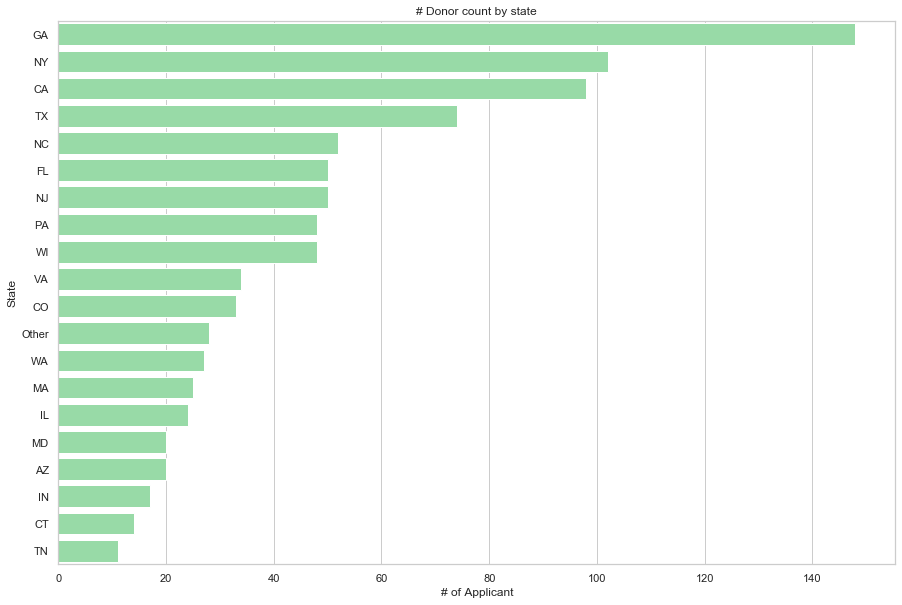

In [47]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="MailingState", y='index', data=doners['MailingState'].value_counts()[:20].reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="State", title='# Donor count by state',
       xlabel="# of Applicant")

plt.show()

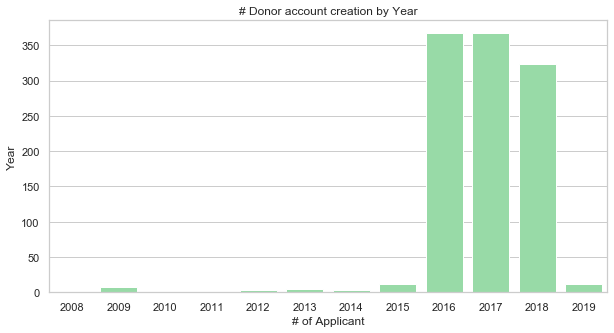

In [48]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='Created_Year', data=doners['Created_Year'].value_counts().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="Year", title='# Donor account creation by Year',
       xlabel="# of Applicant")

plt.show()

*Status of donor*

In [49]:
doners['Active_Color__c'].value_counts()

Red       741
Blue       25
Grey        8
Green       4
Black       1
Purple      1
Name: Active_Color__c, dtype: int64

In [ ]:
##Info about volunteer

In [50]:
df_filt['Volunteer_Agreement_on_File__c'].value_counts()

0    131437
1      1008
Name: Volunteer_Agreement_on_File__c, dtype: int64

In [51]:
volunteer=df_filt[df_filt['Volunteer_Agreement_on_File__c']==1]
volunteer

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,DoNotCall,...,Min_Salary_Expectations__c,Used_Volunteer_Services__c,Used_Federal_Services__c,Hired_By_Partnered_Employer__c,For_Workflow_Update__c,Send_Green_Survey__c,RealZip__RealZip__c,Willing_to_Relocate_to_High_Risk_Area__c,Created_Year,Created_month
25,0030z00002PrXEXAA3,0015000000NC2gEAAT,01238000000UVfW,CA,92131,NaN,00550000001WkUeAAK,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
27,0030z00002PrXEwAAN,0015000000NC2gEAAT,01238000000UVfW,CA,92101,NaN,00550000001WkUeAAK,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
1251,0030z00002QXuuXAAT,0015000000NC2gEAAT,01238000000UVfW,CA,94103,NaN,00550000001WkUeAAK,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
1253,0030z00002QXux2AAD,0015000000NC2gEAAT,01238000000UVfW,GA,30004,NaN,00550000001WkUeAAK,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
1255,0030z00002QXuxRAAT,0015000000NC2gEAAT,01238000000UVfW,TX,75063,NaN,00550000001WkUeAAK,0,0,0,...,NaN,0.0,0.0,0,0,0,NaN,0.0,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130834,0035000002QW7QWAA1,0015000000NC2gEAAT,01238000000UVfW,MD,20852,United States,00550000001WkUeAAK,1,0,0,...,NaN,NaN,NaN,0,0,0,a5D38000000I3gPEAS,NaN,2015,7
131556,0035000002SXCOyAAP,0013800001E6F8NAAV,01238000000UVfW,VA,23235,United States,005500000043hbvAAA,0,0,0,...,"$50,000 - $59,999",1.0,0.0,0,0,0,a5D38000000I38LEAS,0.0,2015,7
131770,0035000002SrAJxAAN,0015000000NC2gEAAT,01238000000UVfW,CA,90501,United States,005380000062eOzAAI,0,0,0,...,NaN,0.0,0.0,0,0,0,a5D38000000I6VWEA0,0.0,2015,8
132145,0035000002TKAQ2AAP,0015000000NC2gEAAT,01238000000UVfW,WA,98109,United States,00550000001WkUeAAK,0,0,0,...,NaN,NaN,NaN,0,0,0,a5D38000000I92jEAC,NaN,2015,8
